# 

In [1]:
import os
import torch
import pickle
from matplotlib import pyplot as plt

In [2]:
def plot_acc(training_name, n_samples):
    output_dir = '../data/outputs'
    filename = os.path.join(output_dir, training_name, f'classification/predictions_{n_samples}_samples')

    with open(filename, 'rb') as f:
        data = pickle.load(f)

    def acc(y, yhat):
        return 100. * torch.sum(y == yhat) / yhat.shape[0]

    t, score = [], []

    for e in sorted(data.keys()):
        y = torch.tensor(data[e]['y'])
        l1_pred = torch.tensor(data[e]['l1_pred'])
        l2_pred = torch.tensor(data[e]['l2_pred'])

        best = max(acc(l1_pred, y), acc(l2_pred, y))
        t.append(e)
        score.append(best)

    training_samples = training_name.split('-')[5]
    print(score)
    plt.plot(t, score, '-*',label=training_samples)

[tensor(37.5000), tensor(42.5781), tensor(51.5625), tensor(46.4844)]
[tensor(37.1094), tensor(41.7969), tensor(49.6094), tensor(48.8281)]
[tensor(48.8281), tensor(54.2969), tensor(50.3906), tensor(53.5156)]
[tensor(53.5156), tensor(42.1875), tensor(58.9844), tensor(62.1094)]
[tensor(56.2500), tensor(57.8125), tensor(60.1562), tensor(66.4062)]


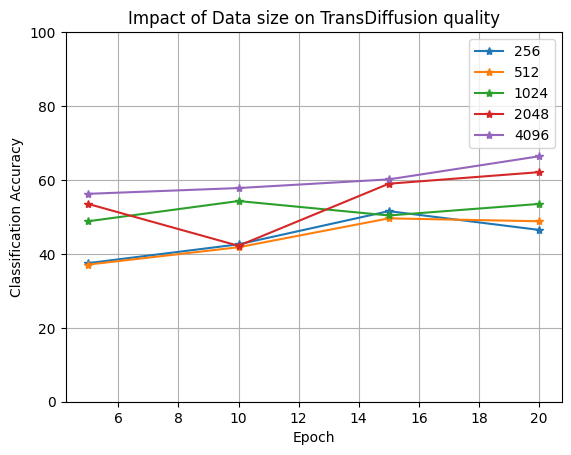

In [4]:
trained_models = [
'2024-05-10T22-04-53_imagenet-256',
'2024-05-10T21-25-21_imagenet-512',
'2024-05-10T17-04-36_imagenet-1024',
'2024-05-10T19-48-18_imagenet-2048',
'2024-05-16T21-28-23_imagenet-4096-50-epochs'
# '2024-05-17T15-29-58_imagenet-1024-80-epochs-fixed-cycles',
# '2024-05-17T21-13-47_imagenet-4096-80-epochs-fixed-cycles'
]

n_samples = 256

for training_name in trained_models:
    plot_acc(training_name, n_samples)

plt.title('Impact of Data size on TransDiffusion quality')
plt.ylabel('Classification Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid('on')
plt.ylim(0, 100)
plt.show()

In [ ]:
# confusion matrix plotter

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# def labels_to_human_labels(labels, human_labels_list):
#     human_labels = [human_labels_list[int(x.detach().cpu().numpy())] for x in labels]  
#     return human_labels

# def plot_confusion_matrix(true_labels, labels_pred, human_labels_list):
#     true_labels_readable = labels_to_human_labels(true_labels, human_labels_list)
#     labels_pred_readable = labels_to_human_labels(labels_pred, human_labels_list)
#     cm = confusion_matrix(true_labels_readable, labels_pred_readable, labels=human_labels_list)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                   display_labels=human_labels_list)
#     fig, ax = plt.subplots(figsize=(12,12))
#     disp.plot(ax=ax)
#     plt.show()